In [1]:
# Datascience libraries
import pandas as pd
import numpy as np

# basic python libraries
import math
import time
import random
import json
from tqdm.notebook import tqdm as pb

# plot
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10

In [2]:
#Parser de fichiers
df = pd.read_csv("data.txt",header=None)
df.head()

,0,1,2,3
0,0,-11.03,-82.33,46
1,1,-4.93,-98.05,96
2,2,81.52,2.41,49
3,3,36.82,-42.62,71
4,4,-69.86,11.88,27


## concatenating nearest neightbours

In [22]:
from sklearn.cluster import KMeans

In [52]:
M = df.values
_n = 1000

In [53]:
kmeans = KMeans(n_clusters=_n, random_state=0).fit(M[:,[1,2]])

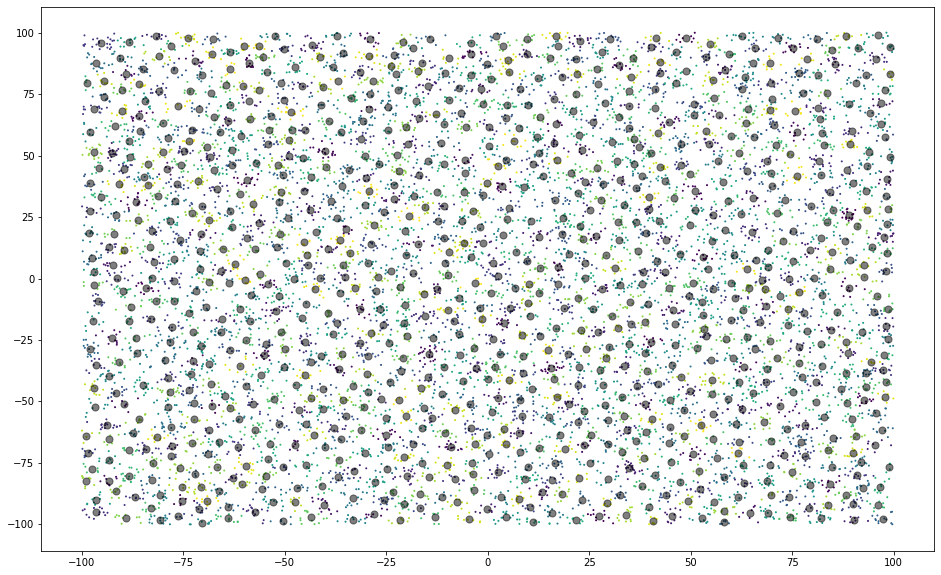

In [54]:
plt.scatter(M[:, 1], M[:, 2], c=kmeans.labels_, s=1, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);

In [55]:
clusters_indicators = np.zeros((_n,3))
for i, cc in enumerate(kmeans.cluster_centers_):
    for j in kmeans.labels_:
        if j == i:
            clusters_indicators[i,0] += M[j,3]
            clusters_indicators[i,1] += math.sqrt((M[j,1] - cc[0])**2 + (M[j,2] - cc[1])**2)
            clusters_indicators[i,2] += 1

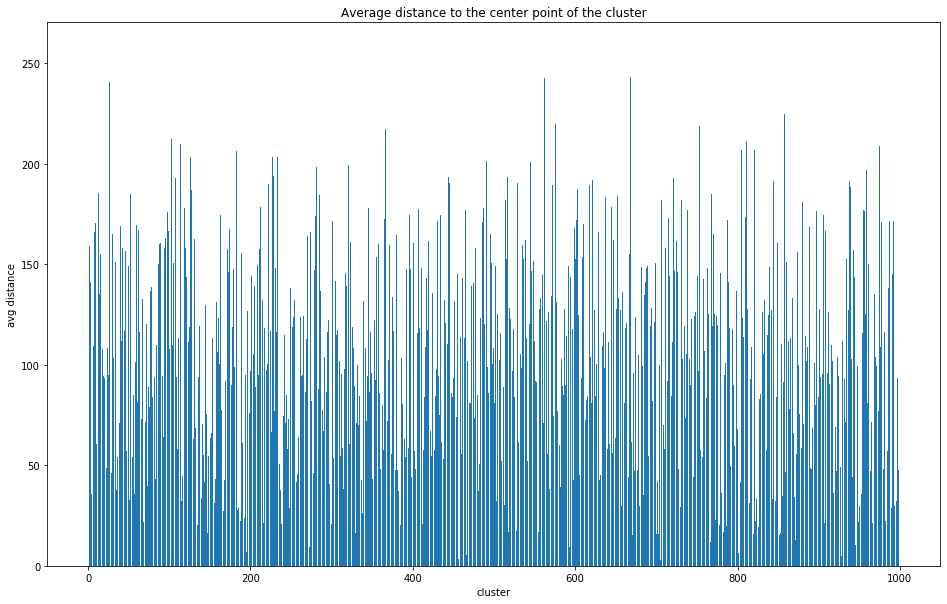

In [56]:
avg_distance_to_center = clusters_indicators[:,1]/clusters_indicators[:,2]
plt.bar([i for i in range(len(avg_distance_to_center))], avg_distance_to_center)
plt.title('Average distance to the center point of the cluster')
plt.xlabel('cluster')
plt.ylabel('avg distance')
plt.show()

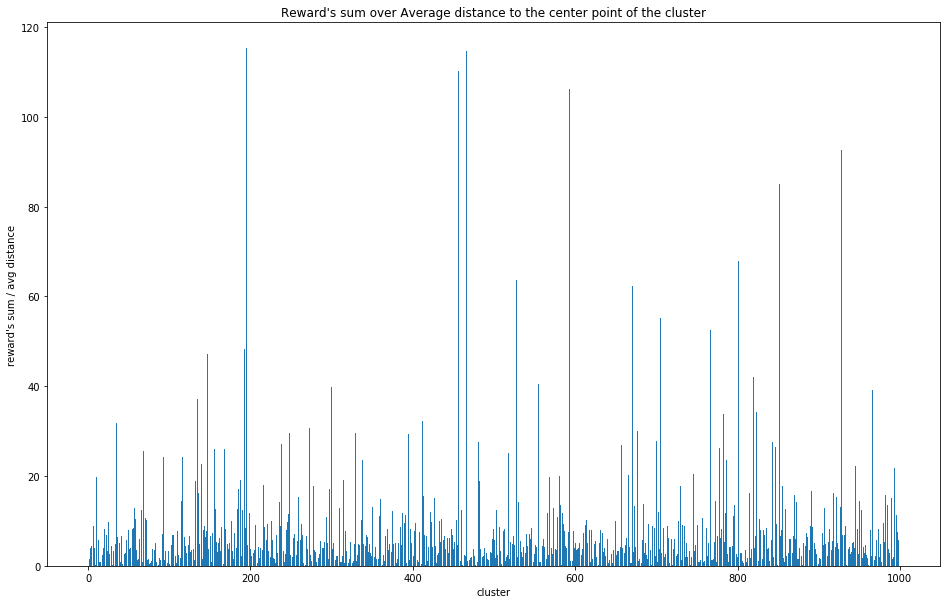

In [57]:
reward_sum_on_avg_distance_to_center = clusters_indicators[:,0]/(clusters_indicators[:,1]/clusters_indicators[:,2])
plt.bar([i for i in range(len(reward_sum_on_avg_distance_to_center))], reward_sum_on_avg_distance_to_center)
plt.title('Reward\'s sum over Average distance to the center point of the cluster')
plt.xlabel('cluster')
plt.ylabel('reward\'s sum / avg distance')
plt.show()

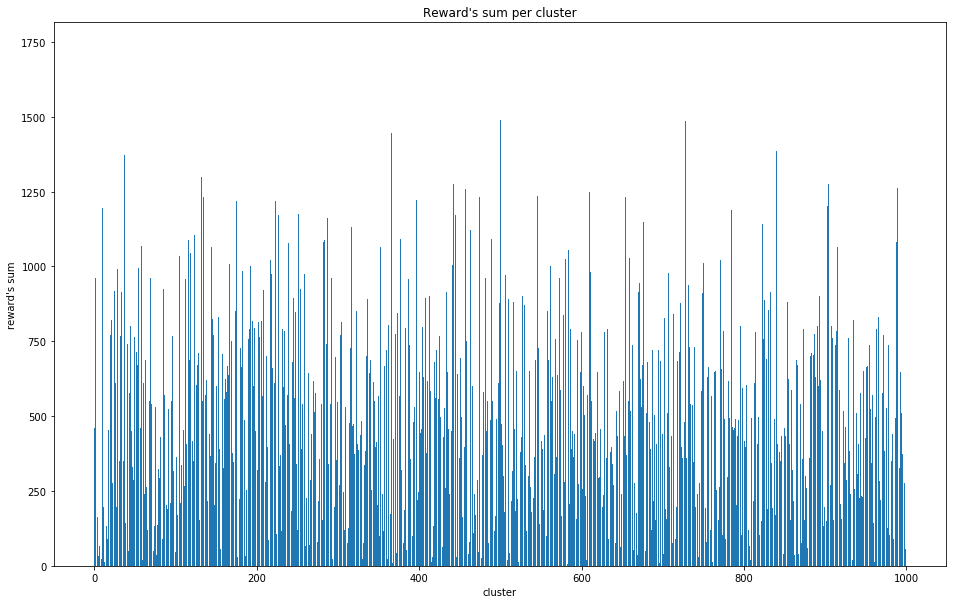

In [61]:
reward_sum = clusters_indicators[:,0]
plt.bar([i for i in range(len(reward_sum_on_avg_distance_to_center))], reward_sum_on_avg_distance_to_center)
plt.title('Reward\'s sum per cluster')
plt.xlabel('cluster')
plt.ylabel('reward\'s sum')
plt.show()

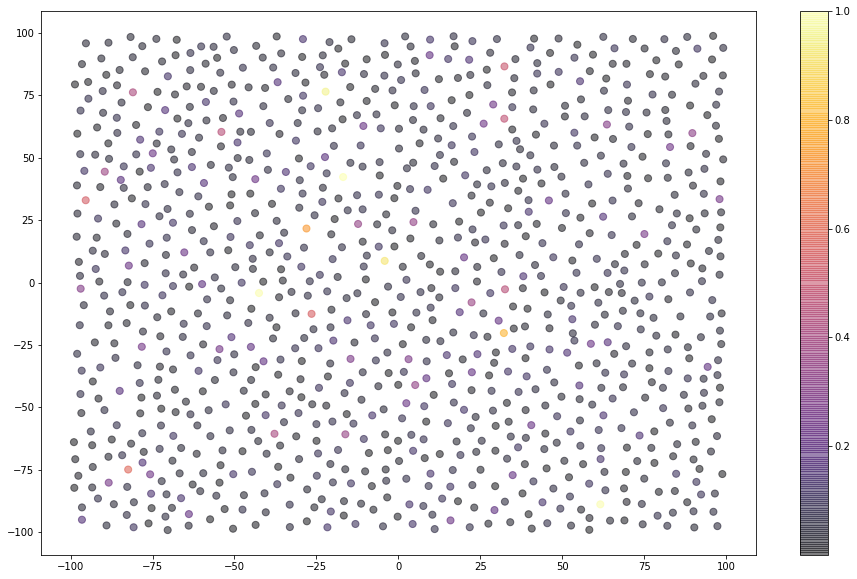

In [59]:
temp = reward_sum_on_avg_distance_to_center/np.max(reward_sum_on_avg_distance_to_center)
centers = kmeans.cluster_centers_
sc = plt.scatter(centers[:, 0], centers[:, 1], c=temp, s=50, alpha=0.5, cmap="inferno");
plt.colorbar(sc)
plt.show()

In [83]:
temp = [[clusters_indicators[i,0],clusters_indicators[i,1],clusters_indicators[i,2], kmeans.cluster_centers_[i]] for i in range(len(clusters_indicators))]
temp.sort(key=lambda x: x[0], reverse=True)
temp = np.matrix(temp)

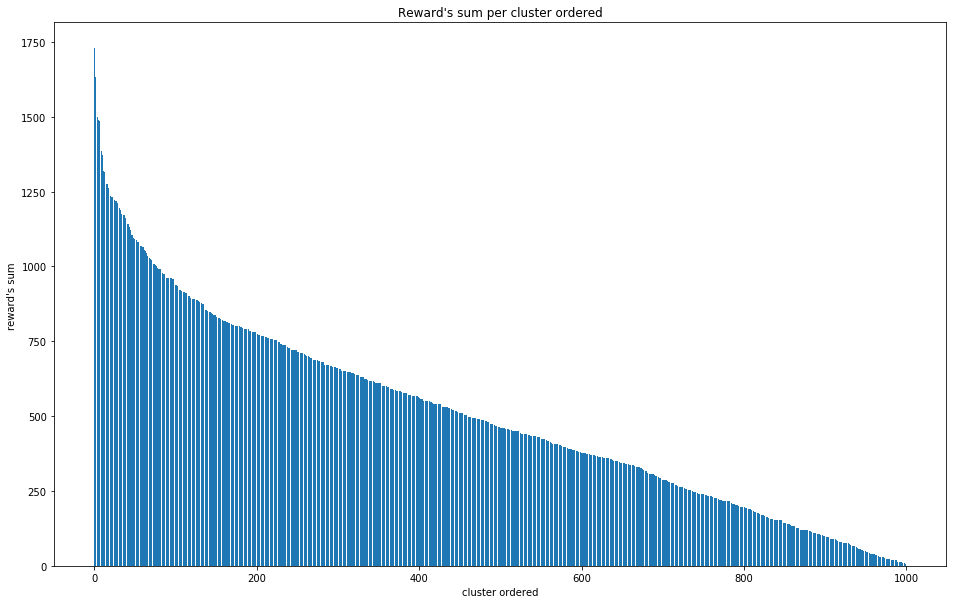

In [84]:
plt.bar([i for i in range(temp.shape[0])], np.ravel(temp[:,0]))
plt.title('Reward\'s sum per cluster ordered')
plt.xlabel('cluster ordered')
plt.ylabel('reward\'s sum ')
plt.show()

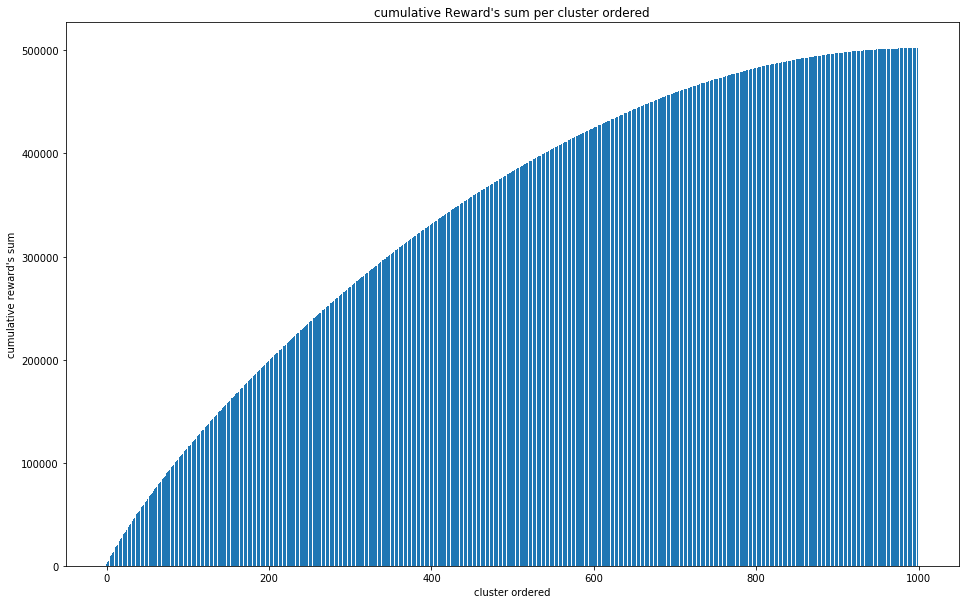

In [85]:
temp2 = []
for i in range(temp.shape[0]):
    if i == 0:
        temp2.append(temp[i,0])
    else:
        temp2.append(temp2[i-1]+temp[i,0])
plt.bar([i for i in range(len(temp2))], temp2)
plt.title('cumulative Reward\'s sum per cluster ordered')
plt.xlabel('cluster ordered')
plt.ylabel('cumulative reward\'s sum')
plt.show()

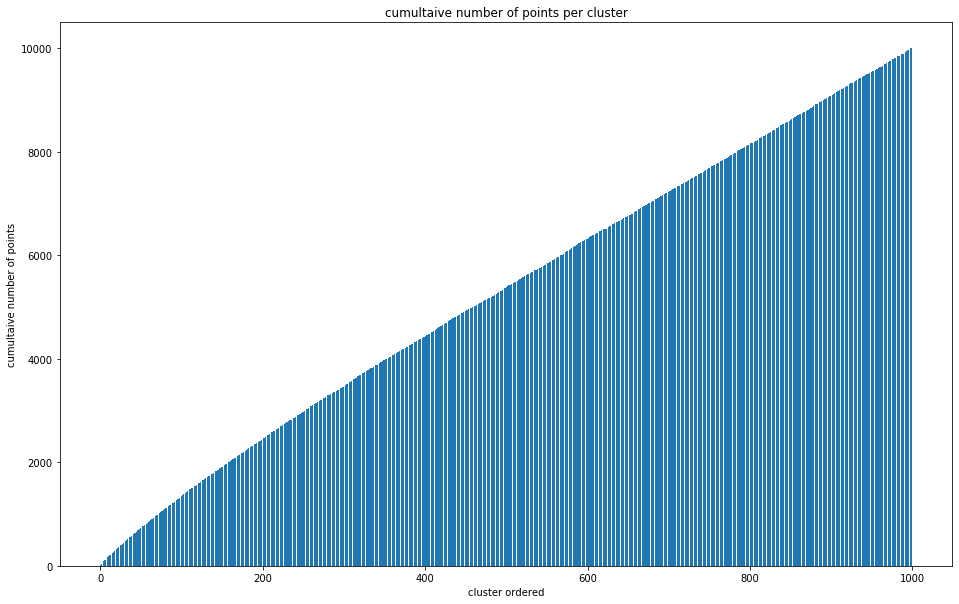

In [86]:
temp2 = []
for i in range(temp.shape[0]):
    if i == 0:
        temp2.append(temp[i,2])
    else:
        temp2.append(temp2[i-1]+temp[i,2])
plt.bar([i for i in range(len(temp2))], temp2)
plt.title('cumultaive number of points per cluster')
plt.xlabel('cluster ordered')
plt.ylabel('cumultaive number of points')
plt.show()

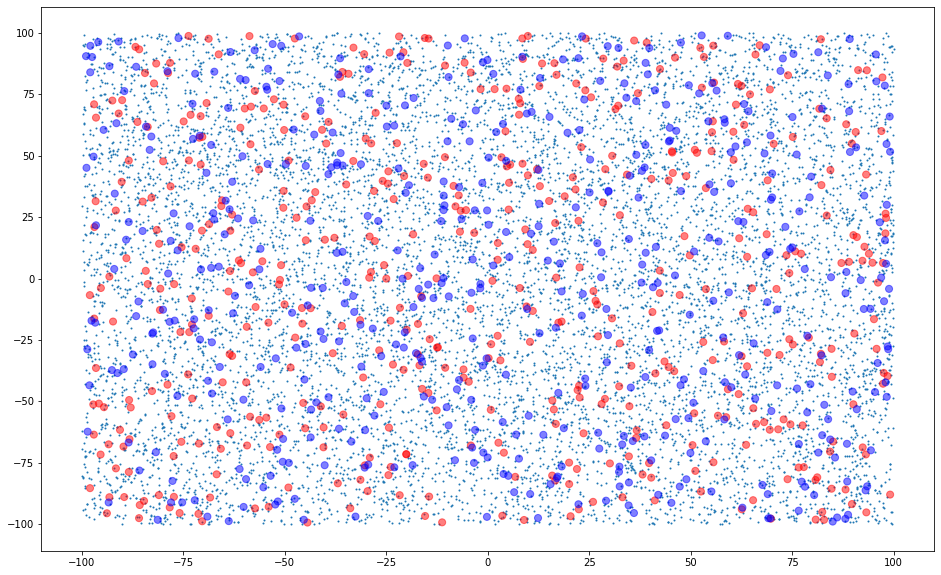

In [93]:
plt.scatter(M[:, 1], M[:, 2], s=1)
temp2 = np.array([temp[i,3] for i in range(temp.shape[0])])
plt.scatter(temp2[:, 0], centers[:, 1], c=['r' if i < 500 else 'b' for i in range(temp.shape[0])], s=50, alpha=0.5)
plt.show()